# Make a plot

Using [example](https://servicex-frontend.readthedocs.io/en/latest/examples.html) from documentation.

In [1]:
from servicex import deliver, dataset
from func_adl_servicex_xaodr22 import FuncADLQueryPHYSLITE, cpp_float


query = FuncADLQueryPHYSLITE()  # type: ignore
jet_info_per_event = (
    query
    .Select(lambda e: e.Jets("AnalysisJets"))
    .Select(lambda jets: [j for j in jets if j.pt() / 1000.0 > 40])
    .Select(
        lambda jets: {
            "pt": jets.Select(lambda j: j.pt() / 1000.0),
            "eta": jets.Select(lambda j: j.eta()),
            "emf": jets.Select(lambda j: j.getAttribute[cpp_float]("EMFrac")),  # type: ignore
        }
    )
)

spec = {
    "Sample": [
        {
            "Name": "func_adl_xAOD_simple",
            "Dataset": dataset.FileList(
                [
                    "root://eospublic.cern.ch//eos/opendata/atlas/rucio/mc20_13TeV/DAOD_PHYSLITE.37622528._000013.pool.root.1",  # noqa: E501
                ]
            ),
            "Query": jet_info_per_event,
            "Codegen": "atlasr22",
        }
    ]
}
files = deliver(spec)

Output()

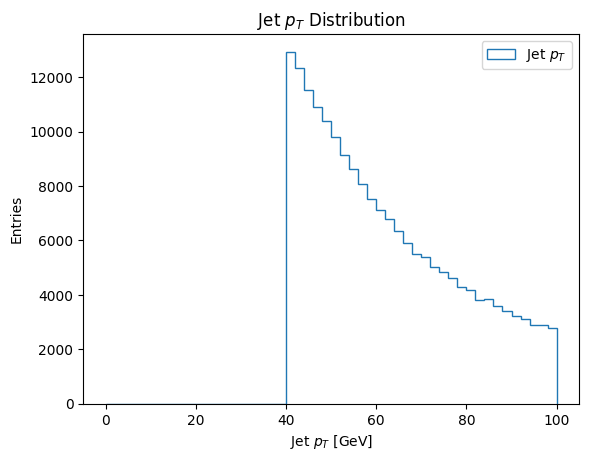

In [2]:
from servicex_analysis_utils import to_awk
import awkward as ak

data = to_awk(files)

import matplotlib.pyplot as plt

# Flatten the pt arrays from all events
pt_values = ak.flatten(data["func_adl_xAOD_simple"].pt)

plt.hist(pt_values, bins=50, histtype="step", label="Jet $p_T$", range=(0, 100))
plt.xlabel("Jet $p_T$ [GeV]")
plt.ylabel("Entries")
plt.title("Jet $p_T$ Distribution")
plt.legend()
plt.show()